<a href="https://colab.research.google.com/github/K7S3/Football-Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
import seaborn as sns

In [ ]:
file_path = './football_data.csv'

input_fd = open(file_path, encoding="UTF-8", errors = 'backslashreplace')
football_data= pd.read_csv(input_fd, encoding = "UTF-8") 
filtered_data = football_data.drop(['Joined','Body Type','Real Face','Photo', 'Flag', 'Club Logo', 'Loaned From','Unnamed: 0', 'Jersey Number'], axis = 1)


In [ ]:
player_features = ['Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties']

In [ ]:
def feetToCMS(x):
  arr = x.split("'")
  return (int(arr[0]) + (int(arr[1])*0.1))*30.48 

filtered_data = filtered_data[filtered_data['Height'].notna()]
filtered_data['Height'] = filtered_data['Height'].apply(lambda x : feetToCMS(x))

filtered_data = filtered_data[filtered_data['Weight'].notna()]
filtered_data['Weight'] = filtered_data['Weight'].apply(lambda x: int(x.split("lbs")[0]))

a = filtered_data.select_dtypes('number')
filtered_data[a.columns] = a.fillna(a.mean())
filtered_data['Club'].fillna('No Club', inplace = True)

filtered_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,2021,173.736,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,2022,188.976,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,2022,179.832,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,2020,195.072,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,2023,185.928,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#TASK 1

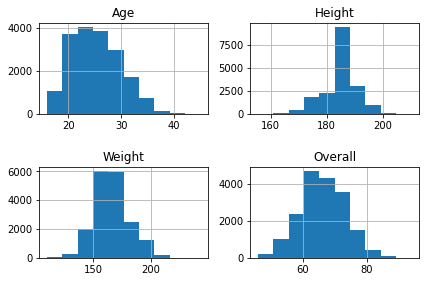

In [ ]:
hist_plot = pd.DataFrame(filtered_data, columns = ['Age', 'Height',  
                                    'Weight', 'Overall'])
hist_plot.hist()
# plt.figure(figsize=(8,8),facecolor='red',edgecolor='blue')
plt.tight_layout(1, 2)
plt.show()

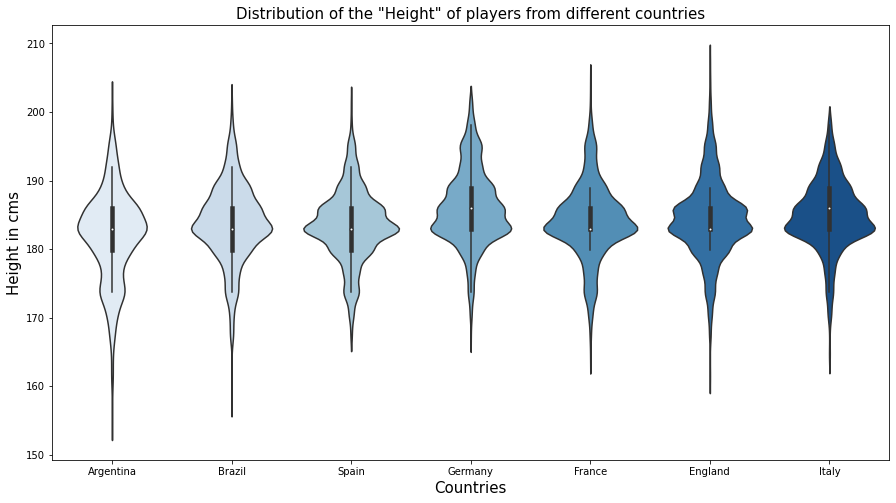

In [ ]:
# Every Nations' Player and their Heights

plt.rcParams['figure.figsize'] = (15, 8)
some_countries = ('Argentina', 'Brazil', 'England', 'Germany', 'Spain', 'France', 'Italy')
data_countries = filtered_data.loc[filtered_data['Nationality'].isin(some_countries) & filtered_data['Height']]
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Height'], palette = 'Blues')
ax.set_title(label = 'Distribution of the "Height" of players from different countries', fontsize = 15)
ax.set_xlabel(xlabel = 'Countries', fontsize = 15)
ax.set_ylabel(ylabel = 'Height in cms', fontsize = 15)

plt.show()

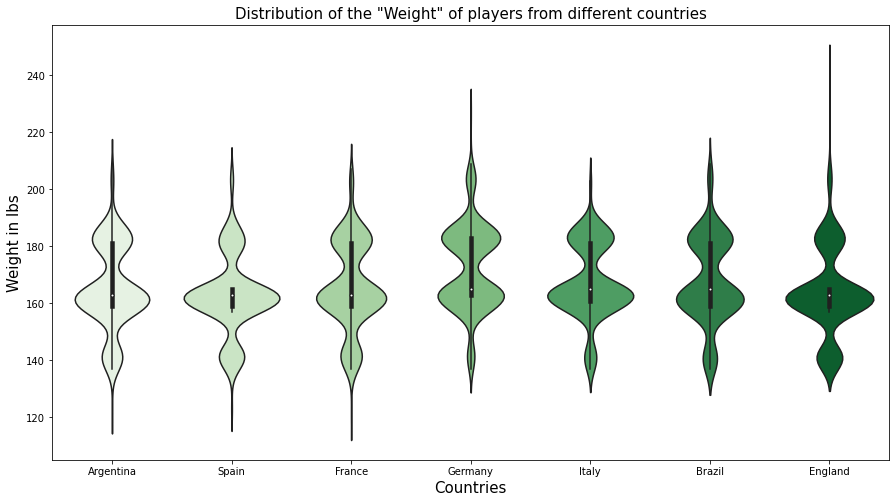

In [ ]:
# Every Nations' Player and their Weights

plt.rcParams['figure.figsize'] = (15, 8)
some_countries = ('Argentina', 'Brazil', 'England', 'Germany', 'Spain', 'France', 'Italy')
data_countries = filtered_data.loc[filtered_data['Nationality'].isin(some_countries) & filtered_data['Weight']]
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Greens')
ax.set_title(label = 'Distribution of the "Weight" of players from different countries', fontsize = 15)
ax.set_xlabel(xlabel = 'Countries', fontsize = 15)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 15)

plt.show()

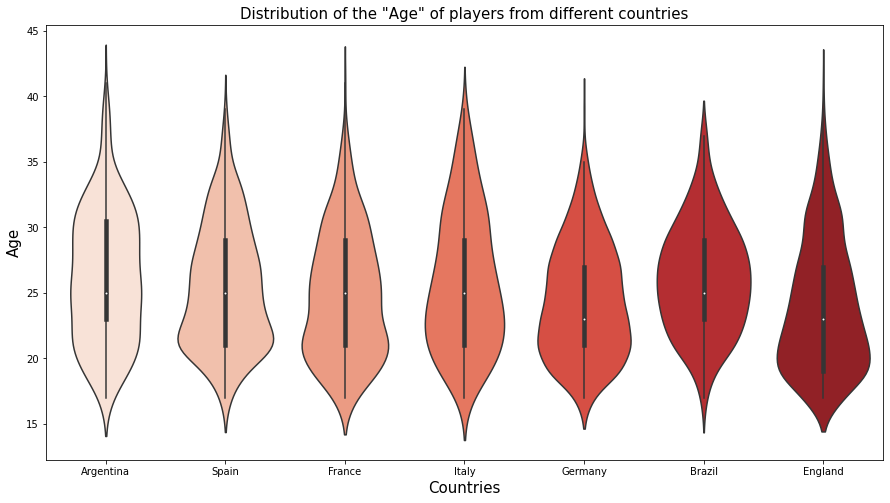

In [ ]:
# Every Nations' Player and their Ages

plt.rcParams['figure.figsize'] = (15, 8)
some_countries = ('Argentina', 'Brazil', 'England', 'Germany', 'Spain', 'France', 'Italy')
data_countries = filtered_data.loc[filtered_data['Nationality'].isin(some_countries) & filtered_data['Age']]
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Age'], palette = 'Reds')
ax.set_title(label = 'Distribution of the "Age" of players from different countries', fontsize = 15)
ax.set_xlabel(xlabel = 'Countries', fontsize = 15)
ax.set_ylabel(ylabel = 'Age', fontsize = 15)

plt.show()

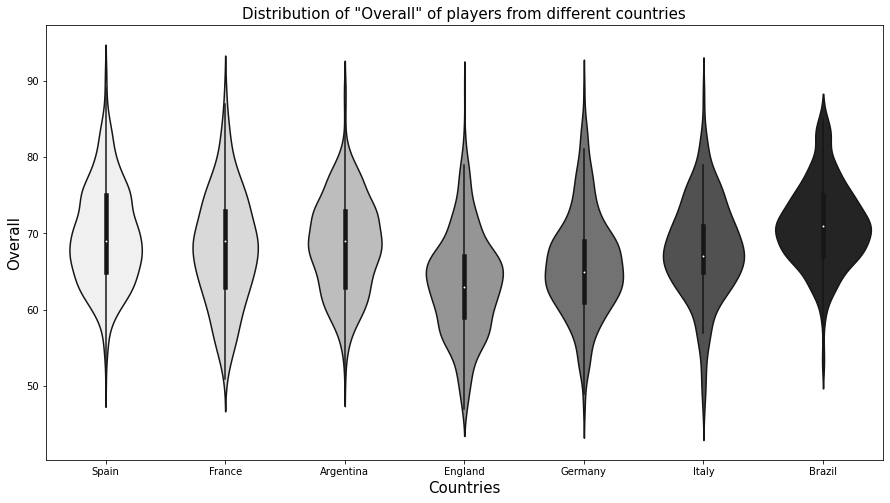

In [ ]:
# Every Nations' Player and their Overalls

plt.rcParams['figure.figsize'] = (15, 8)
some_countries = ('Argentina', 'Brazil', 'England', 'Germany', 'Spain', 'France', 'Italy')
data_countries = filtered_data.loc[filtered_data['Nationality'].isin(some_countries) & filtered_data['Overall']]
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'Greys')
ax.set_title(label = 'Distribution of "Overall" of players from different countries', fontsize = 15)
ax.set_xlabel(xlabel = 'Countries', fontsize = 15)
ax.set_ylabel(ylabel = 'Overall', fontsize = 15)

plt.show()

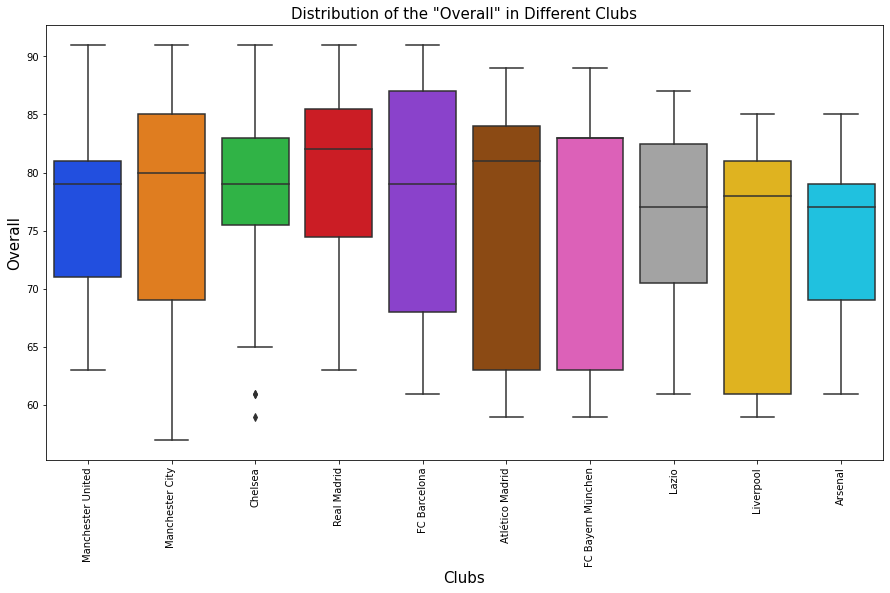

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
some_clubs = ('FC Bayern München','FC Barcelona', 'Real Madrid', 'Liverpool', 'Manchester City', 'Chelsea', 'Arsenal', 
             'Manchester United','Lazio','Atlético Madrid' )
data_clubs = filtered_data.loc[filtered_data['Club'].isin(some_clubs) & filtered_data['Overall']]
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'bright')


ax.set_title(label = 'Distribution of the "Overall" in Different Clubs', fontsize = 15)
ax.set_xlabel(xlabel = 'Clubs', fontsize = 15)
ax.set_ylabel(ylabel = 'Overall', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()


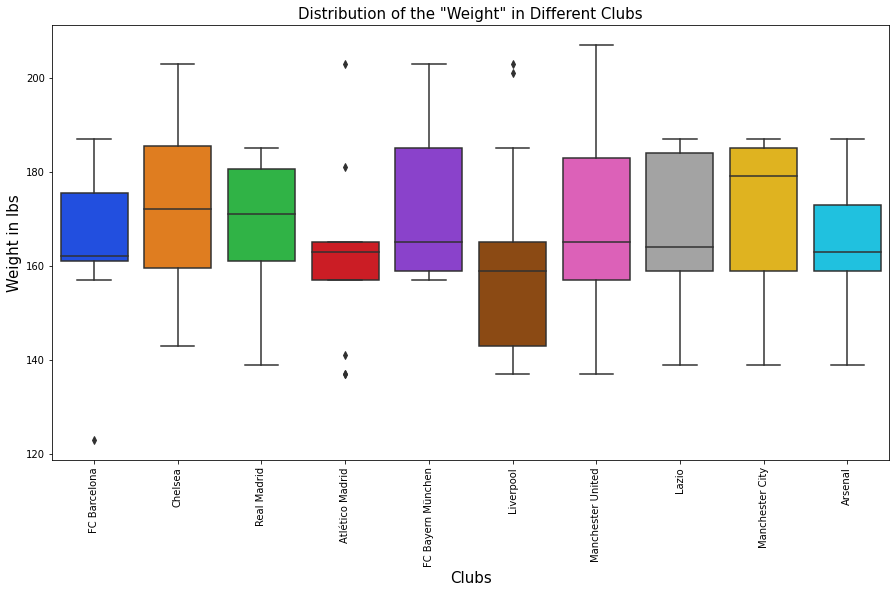

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
some_clubs = ('FC Bayern München','FC Barcelona', 'Real Madrid', 'Liverpool', 'Manchester City', 'Chelsea', 'Arsenal', 
             'Manchester United','Lazio','Atlético Madrid' )
data_clubs = filtered_data.loc[filtered_data['Club'].isin(some_clubs) & filtered_data['Weight']]
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Weight'], palette = 'bright')


ax.set_title(label = 'Distribution of the "Weight" in Different Clubs', fontsize = 15)
ax.set_xlabel(xlabel = 'Clubs', fontsize = 15)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()


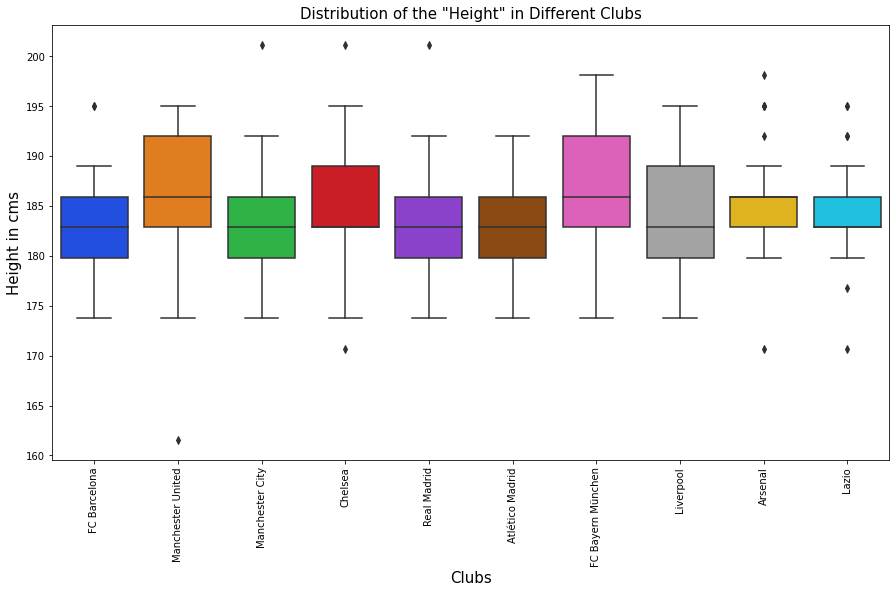

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
some_clubs = ('FC Bayern München','FC Barcelona', 'Real Madrid', 'Liverpool', 'Manchester City', 'Chelsea', 'Arsenal', 
             'Manchester United','Lazio','Atlético Madrid' )
data_clubs = filtered_data.loc[filtered_data['Club'].isin(some_clubs) & filtered_data['Height']]
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Height'], palette = 'bright')


ax.set_title(label = 'Distribution of the "Height" in Different Clubs', fontsize = 15)
ax.set_xlabel(xlabel = 'Clubs', fontsize = 15)
ax.set_ylabel(ylabel = 'Height in cms', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()


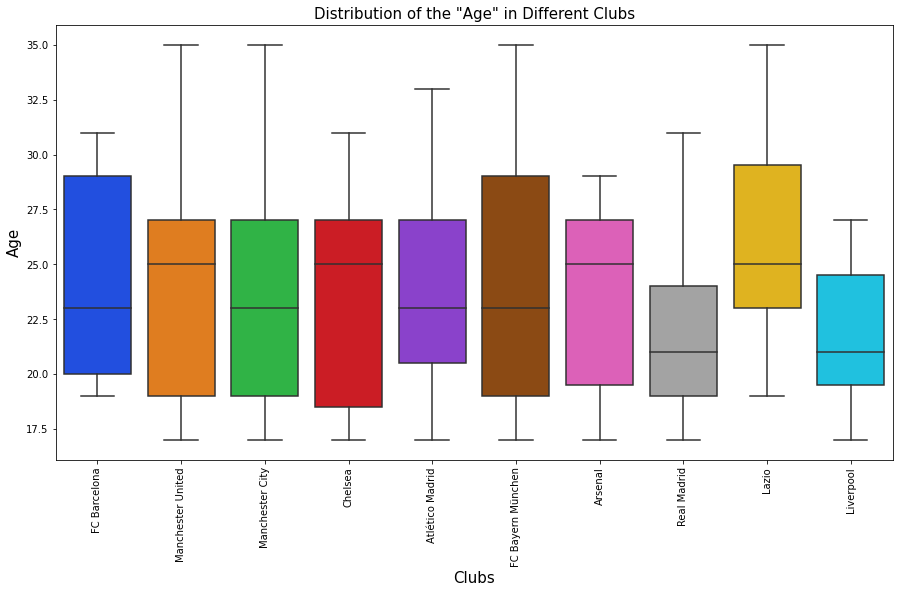

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
some_clubs = ('FC Bayern München','FC Barcelona', 'Real Madrid', 'Liverpool', 'Manchester City', 'Chelsea', 'Arsenal', 
             'Manchester United','Lazio','Atlético Madrid' )
data_clubs = filtered_data.loc[filtered_data['Club'].isin(some_clubs) & filtered_data['Age']]
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Age'], palette = 'bright')


ax.set_title(label = 'Distribution of the "Age" in Different Clubs', fontsize = 15)
ax.set_xlabel(xlabel = 'Clubs', fontsize = 15)
ax.set_ylabel(ylabel = 'Age', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()


In [ ]:
#Top 6 features
for i, val in filtered_data.groupby(filtered_data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}, {}'.format(i, *tuple(val.nlargest(6).index)))

Position CAM: Balance, Agility, Acceleration, BallControl, Dribbling
Position CB: Jumping, Aggression, HeadingAccuracy, Marking, Interceptions
Position CDM: Aggression, Jumping, Balance, BallControl, Interceptions
Position CF: Agility, Balance, Acceleration, Dribbling, BallControl
Position CM: Balance, Agility, Acceleration, BallControl, LongPassing
Position GK: GKReflexes, GKDiving, GKPositioning, GKHandling, GKKicking
Position LAM: Agility, Balance, Acceleration, Dribbling, BallControl
Position LB: Acceleration, Balance, Agility, Jumping, Aggression
Position LCB: Jumping, Aggression, HeadingAccuracy, Marking, Interceptions
Position LCM: Balance, Agility, BallControl, LongPassing, Acceleration
Position LDM: Aggression, BallControl, LongPassing, Balance, Agility
Position LF: Balance, Agility, Acceleration, Dribbling, BallControl
Position LM: Acceleration, Agility, Balance, Dribbling, BallControl
Position LS: Acceleration, Agility, Finishing, Jumping, BallControl
Position LW: Accelerati

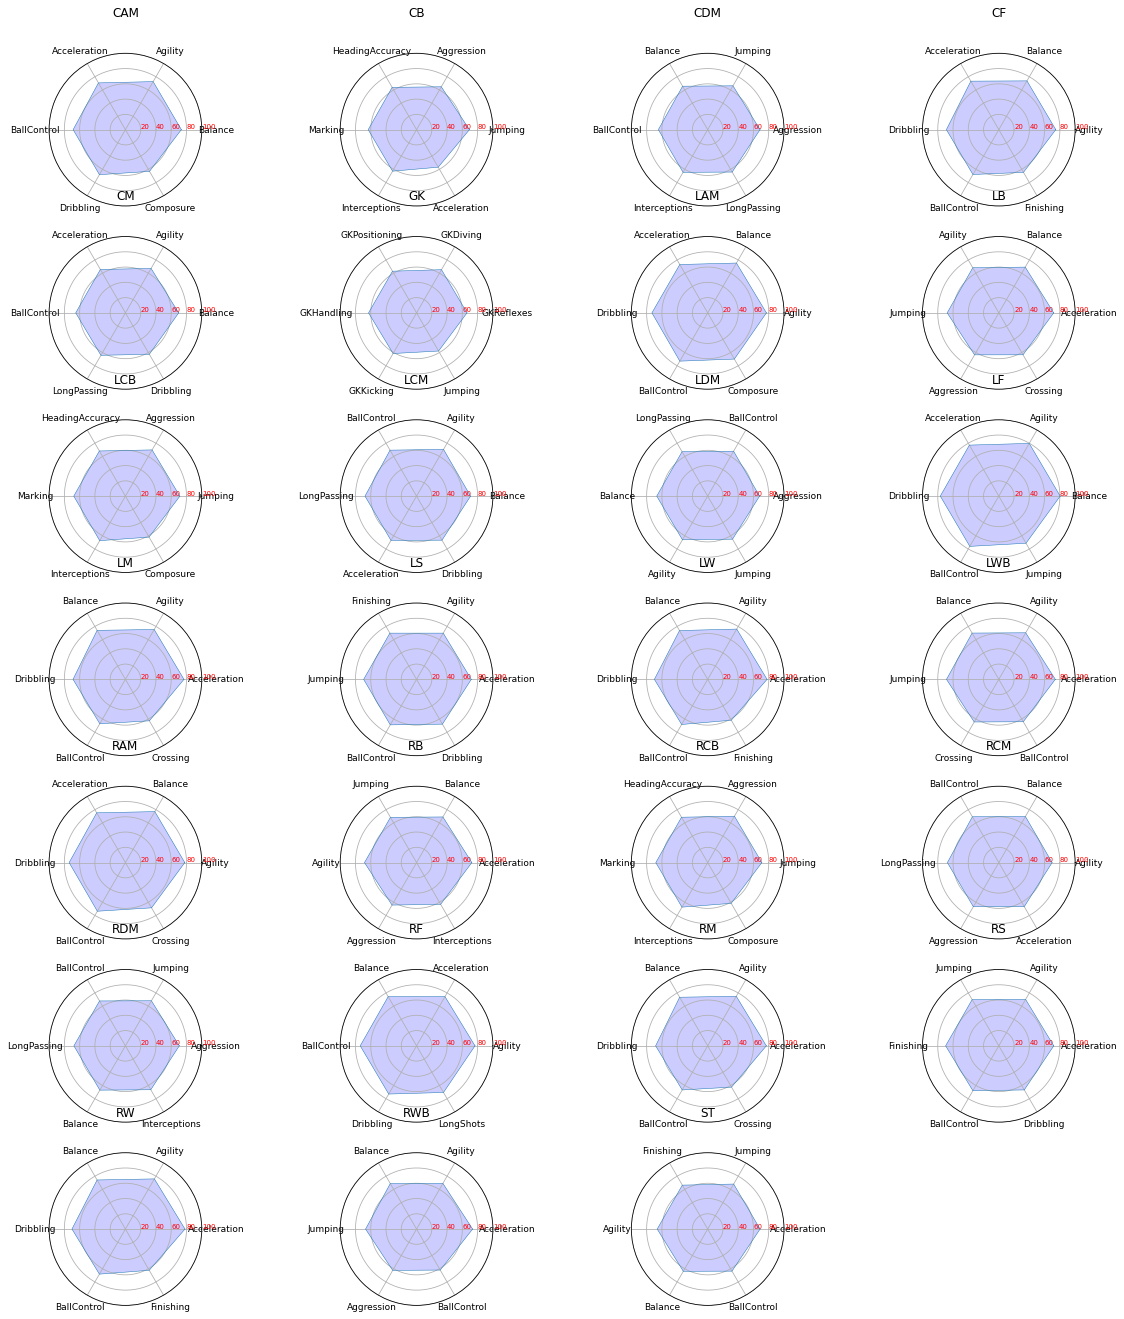

In [ ]:
plt.figure(figsize=(20,50))
idx = 1
for position_name, features in filtered_data.groupby(filtered_data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(6))
    ax = plt.subplot(15, 4, idx, polar=True)
    values = list(top_features.values())
    values += values[:1]
    angles = [(2 * pi * n) / 6 for n in range(0, 6)]
    angles += angles[:1]
    categories=top_features.keys()
    ax.set_rlabel_position(0)
    ax.plot(angles, values, linewidth=0.5, linestyle='solid')    
    ax.fill(angles, values, 'b', alpha=0.2)

    
    plt.title(position_name, size=12, y=1.2)
    plt.xticks(angles[:-1], categories, color='black', size=9)
    plt.yticks([20,40, 60, 80, 100], ["20", "40", "60","80","100"], color="red", size=7)
    plt.ylim(0,100)
    idx += 1 

## OUTLIERS

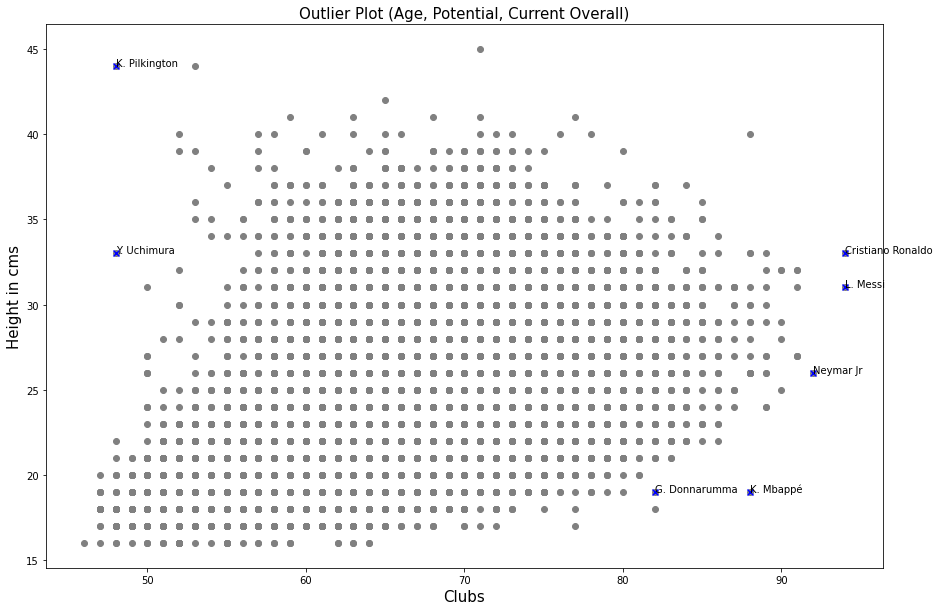

In [ ]:
df = filtered_data.query('Overall >= 92 | (Age > 40 & Overall > 85) | (Age < 20 & Potential > 92) | (Overall < 50 & Age > 30)')
plt.rcParams['figure.figsize'] = (15, 10)

for i in range(0, df.shape[0]):
    plt.annotate(df.Name.tolist()[i], (df.Overall.tolist()[i], df.Age.tolist()[i]))

plt.title('Outlier Plot (Age, Potential, Current Overall)', fontsize = 15)
plt.xlabel('Clubs', fontsize = 15)
plt.ylabel('Height in cms', fontsize = 15)
plt.scatter(filtered_data['Overall'], filtered_data['Age'] , marker="o", color="Grey")
plt.scatter(df.Overall, df.Age, marker="x", color="Blue")
plt.show()

# Task 2- Kmeans

In [ ]:
import numpy as np
import random as rd
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1

            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(44,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

### For K=3

In [ ]:
X = filtered_data.select_dtypes(exclude = 'object').values
m=X.shape[0]
n_iter=100
K = 3
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

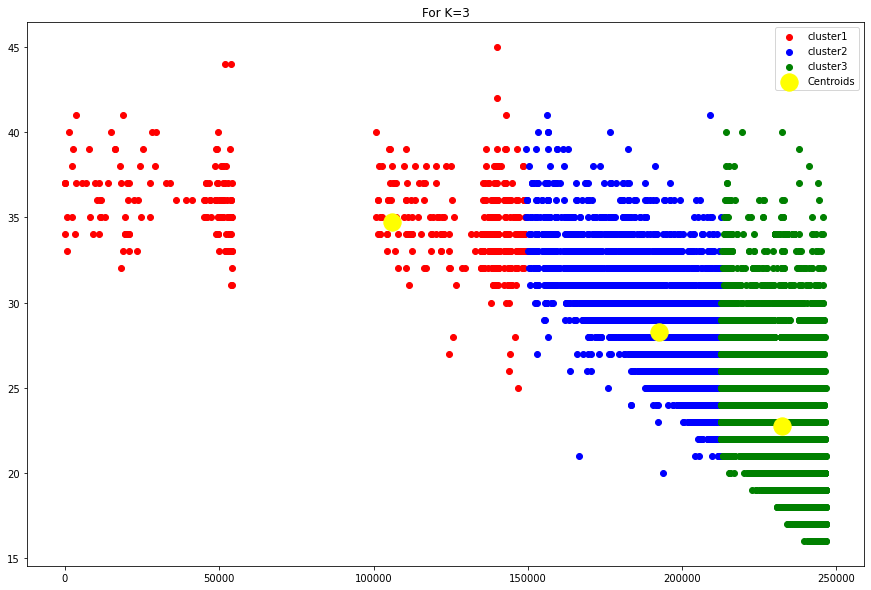

In [ ]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.legend()
plt.title('For K=3')
plt.show()

### **For K=5**

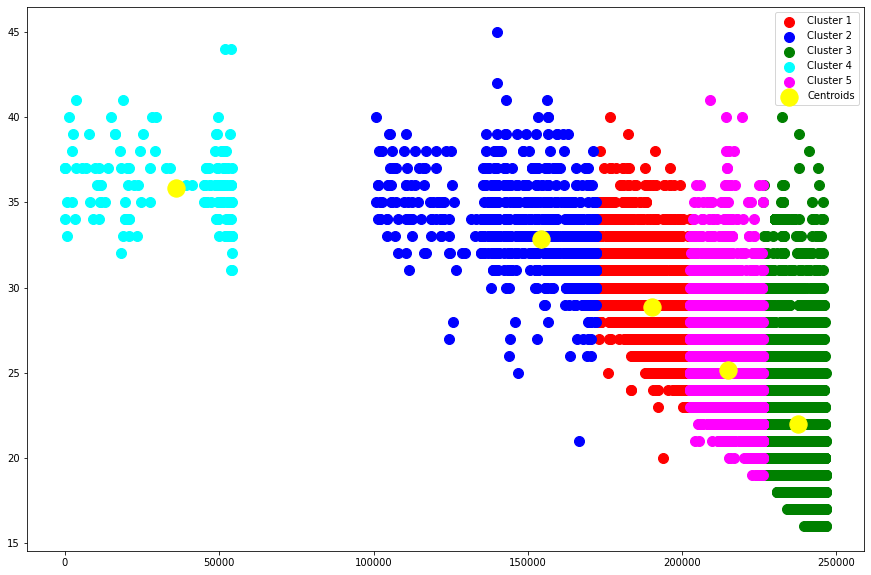

In [ ]:
X = filtered_data.select_dtypes(exclude = 'object').values
m=X.shape[0]
n_iter=100
K = 5
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()

## **For K=7**

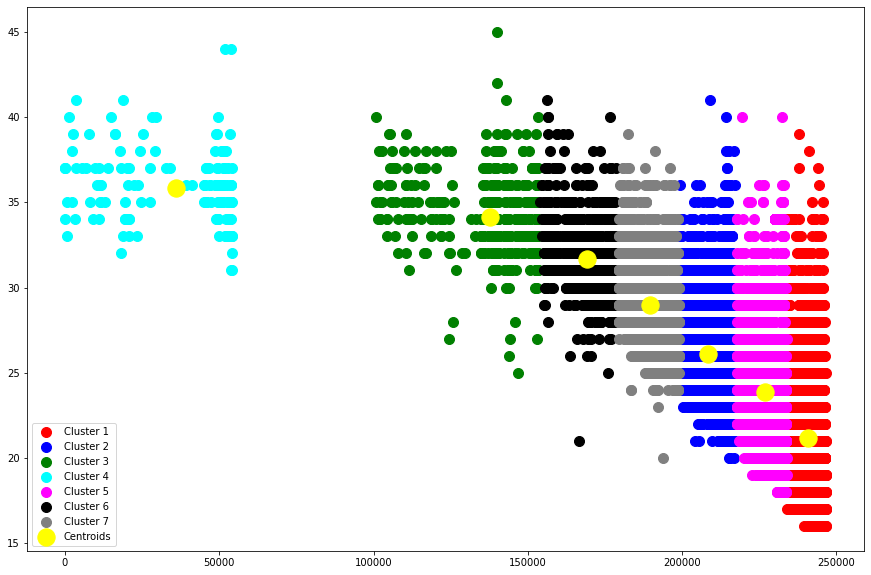

In [ ]:
X = filtered_data.select_dtypes(exclude = 'object').values
m=X.shape[0]
n_iter=100
K = 7
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

color=['red','blue','green','cyan','magenta','black','grey']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()

Elbow method to determine K

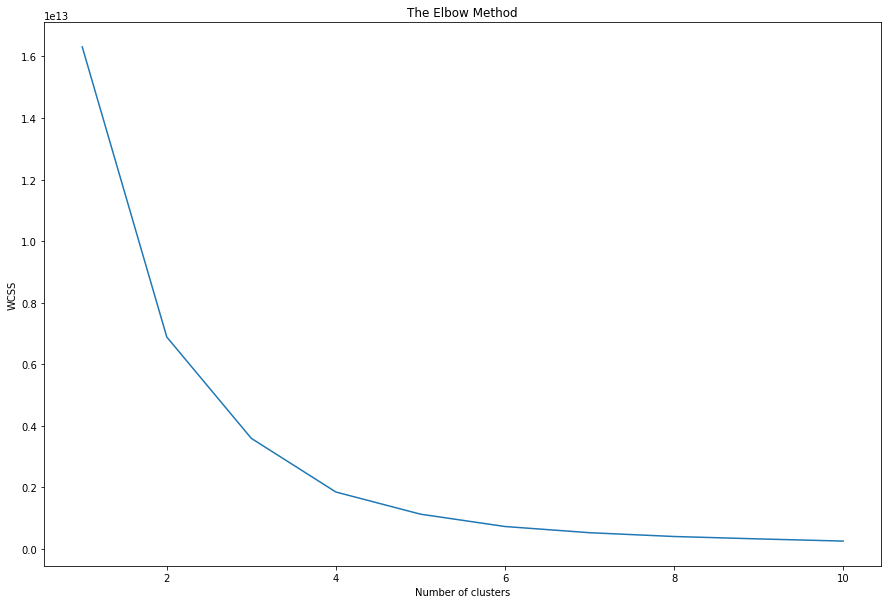

In [ ]:
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

Silhouette Score to determine optimum k

In [ ]:
from sklearn.cluster import KMeans as km
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
  clusterer = km(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(filtered_data.select_dtypes('number'))
  silhouette_avg = silhouette_score(filtered_data.select_dtypes('number'),cluster_labels)
  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.6135024493160925
For n_clusters = 3 The average silhouette_score is : 0.6212590911200889
For n_clusters = 4 The average silhouette_score is : 0.6089885146720515
For n_clusters = 5 The average silhouette_score is : 0.5819292662887278
For n_clusters = 6 The average silhouette_score is : 0.586919095180405
For n_clusters = 7 The average silhouette_score is : 0.5812915451121348
For n_clusters = 8 The average silhouette_score is : 0.5763980309222052
For n_clusters = 9 The average silhouette_score is : 0.5793782723913928
For n_clusters = 10 The average silhouette_score is : 0.585517821070089


# TASK 3

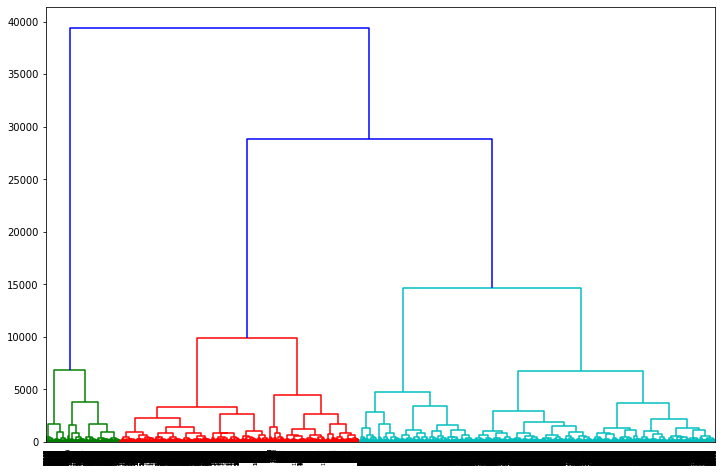

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


X_number_data = filtered_data.select_dtypes(include = np.number)
X_number_data = X_number_data.drop(['ID'], axis = 1)

linked = linkage(X_number_data, 'ward')
plt.figure(figsize = (12,8))

dendrogram(linked, orientation = 'top', distance_sort = 'descending', show_leaf_counts = False)
plt.show()

Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X_number_data)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2).fit_transform(X_number_data)

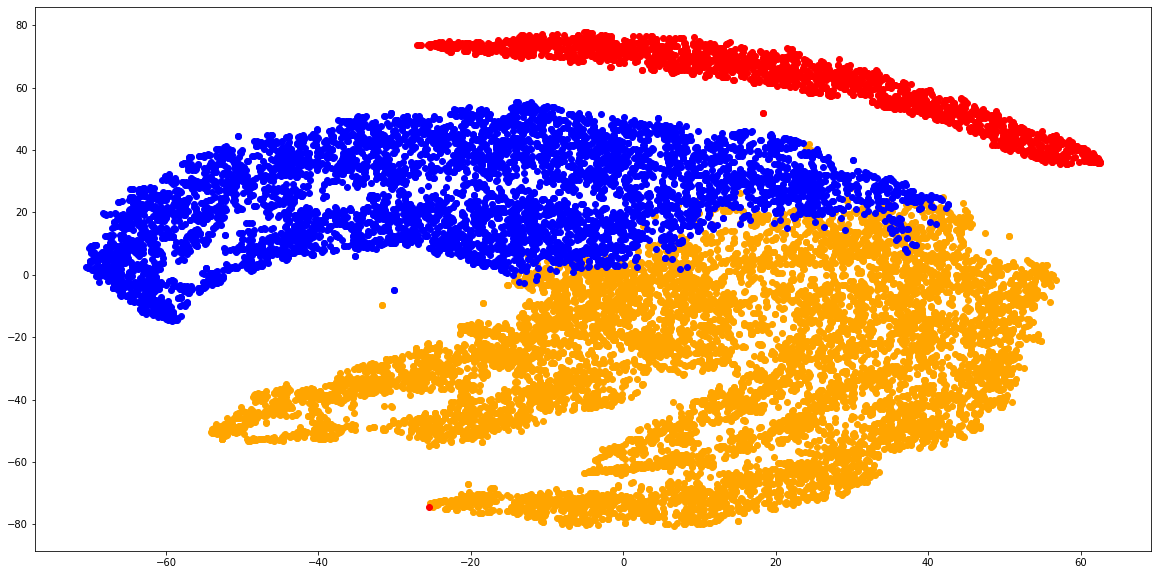

In [ ]:
fig = plt.figure(figsize = (20,10))
plt.scatter(tsne[labels == 0, 0 ], tsne[labels == 0,1 ], c = 'orange', marker = 'o')
plt.scatter(tsne[labels == 1, 0], tsne[labels == 1, 1], c = 'red', marker = 'o')
plt.scatter(tsne[labels == 2, 0], tsne[labels == 2, 1], c = 'blue', marker = 'o')


Divisive


In [ ]:
def get_best_split(data, labels):
  mini = float("inf")
  mini_ind = 0
  for i in range(0, np.unique(labels).size):
    centre = np.mean(data[labels==i], axis=0).reshape(-1,1).T
    newone = np.sum(np.mean((data[labels==i]-centre)**2, axis=0))
    if newone<mini:
      mini=newone
      mini_ind=i

  return mini_ind

In [ ]:
import copy
from sklearn.cluster import KMeans

num_clusters = 5
data = X_number_data.to_numpy()
data_to_divide = copy.deepcopy(data)
data_cp = copy.deepcopy(data)
labs = np.zeros(data.shape[0])
cluster_to_divide=0

for i in range(num_clusters-1):
  km = KMeans(n_clusters=2, random_state=0).fit(data_to_divide)
  labels=km.labels_
  labels[labels==1]= i+1
  labels[labels==0]= cluster_to_divide
  labs[labs==cluster_to_divide] = labels
  cluster_to_divide = get_best_split(data, labs)
  print("Cluster to divide:", cluster_to_divide)
  data_to_divide =  data[labs==cluster_to_divide]

print(labs.shape)
print(labs) 
print(np.unique(labs))

Cluster to divide: 0
Cluster to divide: 0
Cluster to divide: 3
Cluster to divide: 3
(18159,)
[2. 2. 2. ... 1. 1. 1.]
[0. 1. 2. 3. 4.]


# TASK 4

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
X_number_data = filtered_data.select_dtypes(include = np.number)
X_number_data = X_number_data.drop(['ID'], axis = 1)
tsne = TSNE(n_components = 2).fit_transform(X_number_data)

# train the model using DBSCAN
db = DBSCAN(eps=1, min_samples=5)
# the prediction for dbscan clusters
db_clusters = db.fit_predict(tsne)

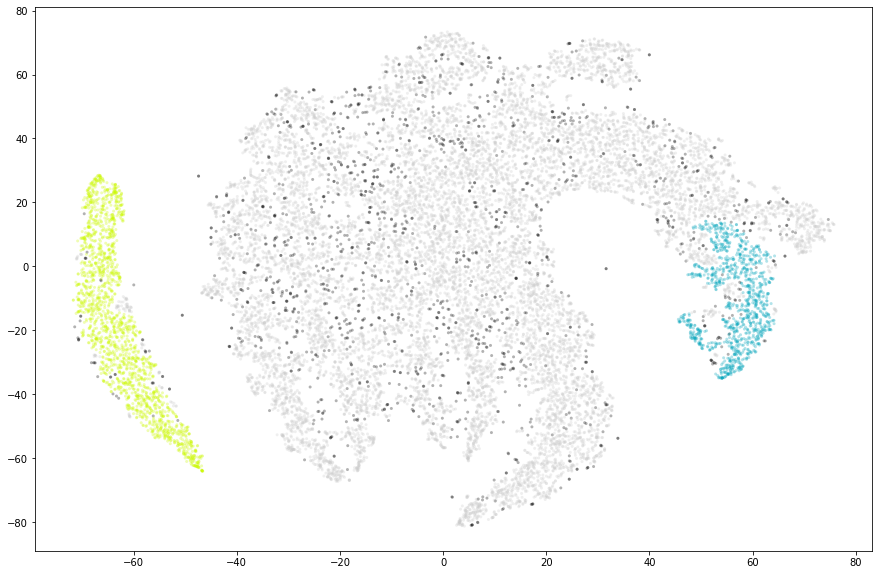

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

colors = cm.nipy_spectral(db_clusters.astype(float)/3)

plt.scatter(tsne[:, 1], tsne[:, 0], marker='.', lw=0, alpha=0.3,
c=colors, edgecolor='k')
plt.show()

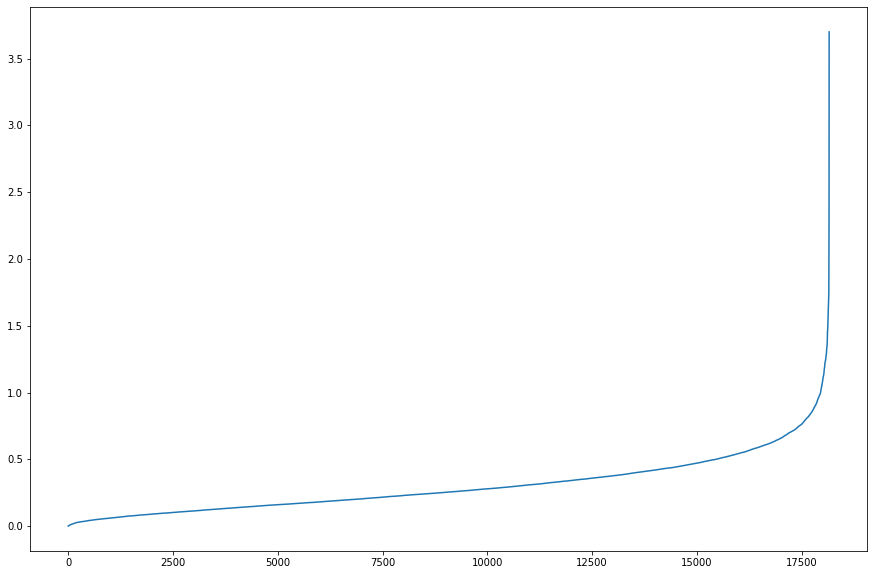

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Calculate distance to closest neighbour
n_n = NearestNeighbors(n_neighbors = 2)

neigbrs = n_n.fit(tsne)
# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = neigbrs.kneighbors(tsne)
# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
cluster_size = np.array([])
for i in range(2,20):
  db= DBSCAN(eps=1.25, min_samples=i)
  db_clusters = db.fit_predict(tsne)
  cluster_length = len(np.unique(db_clusters))
  print(cluster_length)
  cluster_size = np.append(cluster_size, cluster_length)
print(cluster_size)

178
116
87
79
97
112
131
162
210
252
266
273
274
252
222
186
150
120
[178. 116.  87.  79.  97. 112. 131. 162. 210. 252. 266. 273. 274. 252.
 222. 186. 150. 120.]


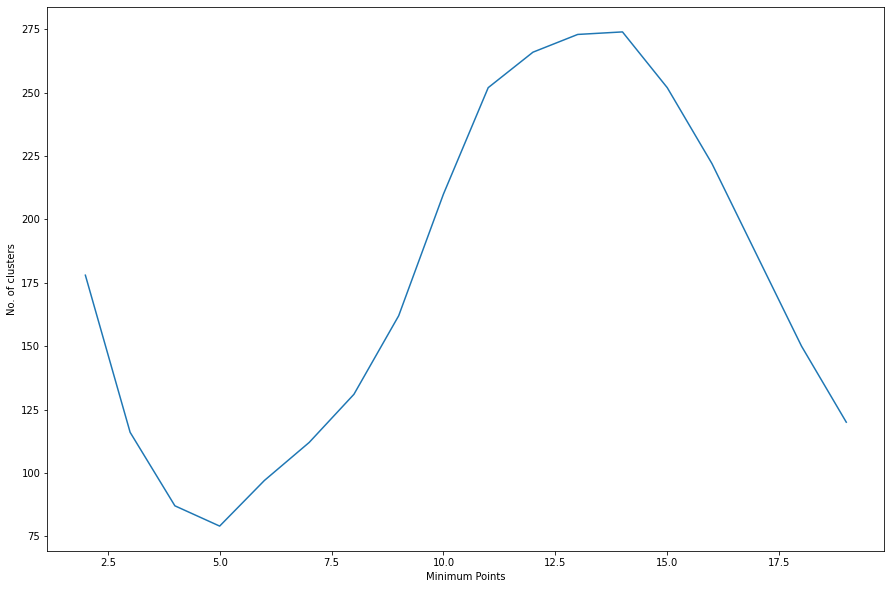

In [ ]:
plt.plot(range(2,20),cluster_size)
plt.xlabel("Minimum Points")
plt.ylabel("No. of clusters")
plt.show()

In [ ]:
db = DBSCAN(eps=1.25, min_samples=6)
db_clusters = db.fit_predict(tsne)

print(len(np.unique(db_clusters)))

97


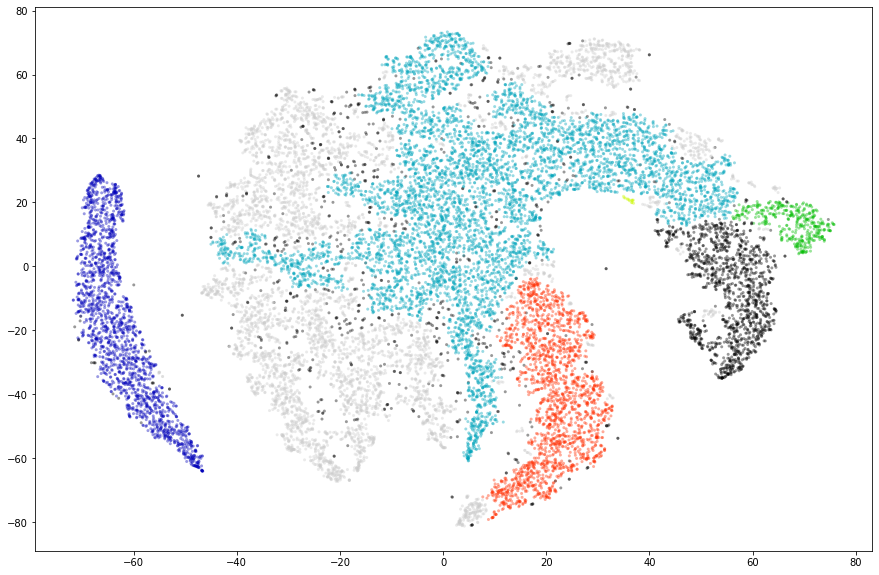

In [ ]:
colors = cm.nipy_spectral(db_clusters.astype(float)/6)

plt.scatter(tsne[:, 1], tsne[:, 0], marker='.', lw=0, alpha=0.4, c=colors, edgecolor='k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(tsne, db_clusters)
print(silhouette_avg)

-0.4715004
